<a href="https://colab.research.google.com/github/ameya-9/BrainTumorClassification-MRIs-/blob/main/LendingClub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

## Understanding the Data and Source:
Before actually diving into the dataset and python code to explore, let's understand the context and background source of the dataset.
1. The data is from Lending Club. This company lends variaous loans to urban customers. 
2. The dataset is divided into Accepted or Loan Accepted and Rejected for Loan Rejected data.
3. Accepted data has 3 scenerios: 
  1. Full Paid : Loan amount has completely being paid both prinicple and interest
  2. Current: The process of paying is in progress, loan is not yet completed.
  3. Charged-off: Applicant not paid amount (defaulted)

In [46]:
def clean(data):
      print("Shapes of the data"+str(data.shape))
      data_without_msng_val = pd.DataFrame()
      #Replacing NAN values : 
      data_without_msng_val = data.replace(r'^\s*$', np.nan, regex=True)
      # Deleting columns with more than 30% missing values
      missing = round(100*(data.isnull().sum()/len(data.index)), 2)
      data_without_msng_val = data_without_msng_val.drop(list(missing[missing >= 30].index),axis=1)
      
      print("Data without missing values shape is "+ str(data_without_msng_val.shape))
      print("Let's check the data types")
      print("Column/Feature    Unique Values count     Datatype")
      for i in data_without_msng_val.columns:
        data_without_msng_val = data_without_msng_val.drop(list(data_without_msng_val[data_without_msng_val[i] == ''].index),axis = 1)
        print(i,len(data_without_msng_val[i].unique()),data_without_msng_val[i].dtypes,sep=' ')
      return data_without_msng_val
      

In [126]:
def analysis(data):
      print("Data top 5 rows"+str(data.head(5)))
      print("Data top 5 rows"+str(data.describe().T))


In [127]:
def categorical_pieplot(df, arr):
    for idx, val in enumerate(arr, start=1):
        ax = df.groupby(val).loan_amnt.count().plot.pie(colors=sns.color_palette("pastel", 16))
        plt.title(str(arr))
        plt.show()



In [91]:
# This method plots a distribution of target column, and its boxplot against loan_status column
def boxplot_distributionplot(dataframe, col):
    plt.figure(figsize=(25,10))
    plt.subplot(1, 2, 1)
    ax = sns.histplot(dataframe[col])
    plt.subplot(1, 2, 2)
    sns.boxplot(x=dataframe[col], y=dataframe['loan_status'], data=dataframe)
    plt.show()


In [121]:
# This method prints two plots side by side 
# Left one is percentage of a categorical variable in the entire dataset 
# Right is the current number of loans
def plot_percentages(data, feature, sortbyindex=False):
    plt.subplot(1, 2, 1)
    values = (data[feature].value_counts(normalize=True)*100)
    if sortbyindex:
        values = values.sort_index()
    ax = values.plot.bar(color=sns.color_palette('pastel', 16))
    ax.set_ylabel('% in dataset', fontsize=16)
    ax.set_xlabel(feature, fontsize=12)

    plt.subplot(1, 2, 2)
    #ax = master_loan.groupby('loan_status')['term'].value_counts(normalize=True).loc[:'Charged Off'].plot.bar(color=sns.color_palette('husl', 16))
    values = (data.loc[data['loan_status']=='current'][feature].value_counts(normalize=True)*100)
    if sortbyindex:
        values = values.sort_index()
    ax = values.plot.bar(color=sns.color_palette('pastel', 16))
    ax.set_ylabel('% in Current loans', fontsize=16)

In [12]:
a_data = pd.read_csv("accepted_2007_to_2018Q4 2.csv")
r_data = pd.read_csv("rejected_2007_to_2018Q4 2.csv")
print("Shapes of the data of rejected loan application"+str(r_data.shape))
print("Shapes of the data of accepted loan application"+str(a_data.shape))
a_data.head(5)
r_data.head(5)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (19,59) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Shapes of the data of rejected loan application(3941115, 9)
Shapes of the data of accepted loan application(357793, 151)


,Amount Requested,Application Date,Loan Title,Risk_Score,Debt-To-Income Ratio,Zip Code,State,Employment Length,Policy Code
0,1000.0,2007-05-26,Wedding Covered but No Honeymoon,693.0,10%,481xx,NM,4 years,0.0
1,1000.0,2007-05-26,Consolidating Debt,703.0,10%,010xx,MA,< 1 year,0.0
2,11000.0,2007-05-27,Want to consolidate my debt,715.0,10%,212xx,MD,1 year,0.0
3,6000.0,2007-05-27,waksman,698.0,38.64%,017xx,MA,< 1 year,0.0
4,1500.0,2007-05-27,mdrigo,509.0,9.43%,209xx,MD,< 1 year,0.0


In [13]:
a_data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=151)

In [29]:
cleaned_a_data = clean(a_data)
cleaned_a_data.head()

Shapes of the data(357793, 151)
Data without missing values shape is (357793, 93)
Let's check the data types
Column/Feature    Unique Values count     Datatype
id 357793 int64
loan_amnt 1361 float64
funded_amnt 1361 float64
funded_amnt_inv 1367 float64
term 2 object
int_rate 94 float64
installment 34808 float64
grade 7 object
sub_grade 35 object
emp_title 105966 object
emp_length 12 object
home_ownership 4 object
annual_inc 23430 float64
verification_status 3 object
issue_d 10 object
loan_status 7 object
pymnt_plan 2 object
url 357793 object
purpose 14 object
title 21 object
zip_code 907 object
addr_state 49 object
dti 4086 float64
delinq_2yrs 26 float64
earliest_cr_line 663 object
fico_range_low 38 float64
fico_range_high 38 float64
inq_last_6mths 7 float64
open_acc 70 float64
pub_rec 27 float64
revol_bal 59160 float64
revol_util 1199 float64
total_acc 122 float64
initial_list_status 2 object
out_prncp 26082 float64
out_prncp_inv 27414 float64
total_pymnt 326651 float64
total_pymnt_in

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,...,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,68407277,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,4421.723917,4421.72,3600.00,821.72,...,144904.0,9300.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,4.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,N,Cash,N
1,68355089,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,25679.660000,25679.66,24700.00,979.66,...,204396.0,111800.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,0.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,N,Cash,N
2,68341763,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,truck driver,10+ years,MORTGAGE,63000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,home_improvement,NaN,605xx,IL,10.78,0.0,Aug-2000,695.0,699.0,0.0,6.0,0.0,7869.0,56.2,18.0,w,0.00,0.00,22705.924294,22705.92,20000.00,2705.92,...,189699.0,14000.0,6.0,31617.0,2737.0,55.9,0.0,0.0,125.0,184.0,14.0,14.0,5.0,101.0,10.0,0.0,2.0,3.0,2.0,4.0,6.0,4.0,7.0,3.0,6.0,0.0,0.0,0.0,0.0,100.0,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0,N,Cash,N
3,66310712,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,Information Systems Officer,10+ years,MORTGAGE,110000.0,Source Verified,Dec-2015,Current,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,076xx,NJ,17.06,0.0,Sep-2008,785.0,789.0,0.0,13.0,0.0,7802.0,11.6,17.0,w,15897.65,15897.65,31464.010000,31464.01,19102.35,12361.66,...,301500.0,67300.0,2.0,23192.0,54962.0,12.1,0.0,0.0,36.0,87.0,2.0,2.0,1.0,2.0,NaN,0.0,4.0,5.0,8.0,10.0,2.0,10.0,13.0,5.0,13.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,0.0,381215.0,52226.0,62500.0,18000.0,N,Cash,N
4,68476807,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,3 years,MORTGAGE,104433.0,Source Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,major_purchase,Major purchase,174xx,PA,25.37,1.0,Jun-1998,695.0,699.0,3.0,12.0,0.0,21929.0,64.5,35.0,w,0.00,0.00,11740.500000,11740.50,10400.00,1340.50,...,331730.0,34000.0,10.0,27644.0,4567.0,77.5,0.0,0.0,128.0,210.0,4.0,4.0,6.0,4.0,1.0,0.0,4.0,6.0,5.0,9.0,10.0,7.0,19.0,6.0,12.0,0.0,0.0,0.0,4.0,96.6,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0,N,Cash,N


There are a few columns having a single unique value or all unique values. These may have nothing much to contribute to the analysis i.e. columns which are far from being the driving columns towards loan default. Some other columns are redundant.

These columns are:

1.  **id** :\
    is a random number given to the loan, does not contribute to analysis
2.  **pymnt_plan** :\
    value for entire dataset is 'n', therefore can be removed.
3.  **url** :\
    is a URL for LC page for corresponding to each memberid, nothing to do with loan default.
4. **funded_amnt** :\
    value for this column is almost equivalent to loan_amnt. removing to avoid multi colinearity.
5.  **zip_code** :\
    first 3 digits of the 5 digit zip code are visible, also is redundant with addr_state, does not contribute to analysis
6.  **initial_list_status** :\
    value for entire dataset is 'f' out of the possible values, therefore can be removed.
7.  **policy_code** :\
    value for entire dataset is '1', indicating all are publicly available, therefore nothing to contribute for analysis, to be removed.
8.  **application_type** :\
    value for entire dataset is 'INDIVIDUAL', indicating all are individual applications not joint, therefore nothing to contribute for analysis, to be removed.
9.  **acc_now_delinq** :\
    value for entire dataset is '0', therefore can be removed.
10. **delinq_amnt** :\
    value for entire dataset is '0', therefore can be removed.

11. **funded_amnt_inv** :\
    value for this column is almost equivalent to funded_amnt. removing to avoid multi colinearity. Also this wont be available at the time of decision making of funding a loan.

In [57]:
#Dropping more columns which are not important for analysis:
# earliest_cr_line : The date the borrower's earliest reported credit line was opened since it's not related to loan being payed or not
#Url : no additional data
#Zip_code : same information as state data
#last_pymnt_d : last_pymnt_d
to_drop = ['id','funded_amnt','funded_amnt_inv','pymnt_plan','url','zip_code','initial_list_status','policy_code','application_type','acc_now_delinq','delinq_amnt']
ncleaned_a_data = cleaned_a_data.drop(to_drop, axis = 1)
ncleaned_a_data.shape

(357793, 82)

In [59]:
# the term columns has months added in the values as well so let's just have the month 
ncleaned_a_data['term'] = ncleaned_a_data.term.apply(lambda x: x.split()[0])

term 36    240593
60    117200
Name: term, dtype: int64


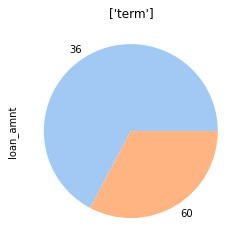

grade C    102632
B    100906
A     62218
D     52310
E     29624
F      8361
G      1742
Name: grade, dtype: int64


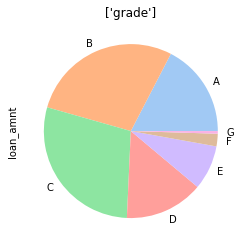

home_ownership MORTGAGE    176829
RENT        141773
OWN          39189
ANY              2
Name: home_ownership, dtype: int64


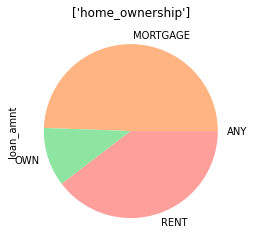

verification_status Source Verified    155858
Verified           104837
Not Verified        97098
Name: verification_status, dtype: int64


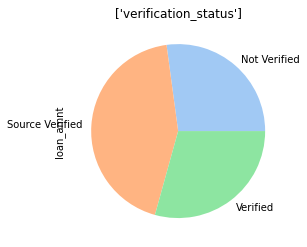

loan_status Fully Paid            253414
Charged Off            64302
Current                38054
Late (31-120 days)      1227
In Grace Period          546
Late (16-30 days)        249
Default                    1
Name: loan_status, dtype: int64


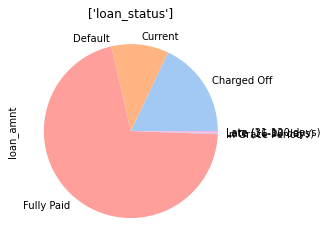

hardship_flag N    357746
Y        46
Name: hardship_flag, dtype: int64


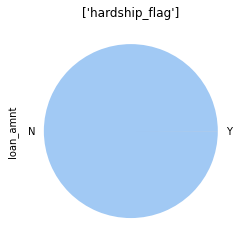

disbursement_method Cash    357792
Name: disbursement_method, dtype: int64


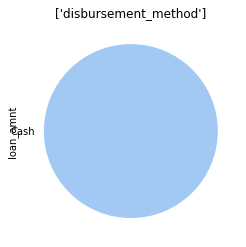

debt_settlement_flag N    347769
Y     10023
Name: debt_settlement_flag, dtype: int64


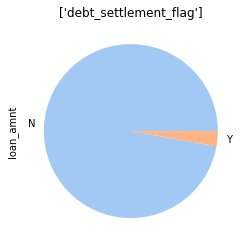

In [116]:
#Checking the Categorical data values
categorical = [feature for feature in ncleaned_a_data.columns if ncleaned_a_data[feature].dtype == "O"]
for i in categorical:
  if len(ncleaned_a_data[i].unique())<10:

    print(i, ncleaned_a_data[i].value_counts())
    categorical_pieplot(ncleaned_a_data, [i])

As per the graphs above
1. Loan Amount is predominately cash, so it's safe to drop the columns as well.
2.Hardship flag is No for 99% values


In [48]:
#Calling clean again to remove features with majority empyt values
ncleaned_a_data = clean(ncleaned_a_data)

Shapes of the data(357793, 82)
Data without missing values shape is (357793, 82)
Let's check the data types
Column/Feature    Unique Values count     Datatype
loan_amnt 1361 float64
term 2 object
int_rate 94 float64
installment 34808 float64
grade 7 object
sub_grade 35 object
emp_title 105966 object
emp_length 12 object
home_ownership 4 object
annual_inc 23430 float64
verification_status 3 object
issue_d 10 object
loan_status 7 object
purpose 14 object
title 21 object
addr_state 49 object
dti 4086 float64
delinq_2yrs 26 float64
earliest_cr_line 663 object
fico_range_low 38 float64
fico_range_high 38 float64
inq_last_6mths 7 float64
open_acc 70 float64
pub_rec 27 float64
revol_bal 59160 float64
revol_util 1199 float64
total_acc 122 float64
out_prncp 26082 float64
out_prncp_inv 27414 float64
total_pymnt 326651 float64
total_pymnt_inv 302924 float64
total_rec_prncp 80846 float64
total_rec_int 245263 float64
total_rec_late_fee 5614 float64
recoveries 38979 float64
collection_recovery_fee 4

* * * * *

Analysis
========

* * * * *

Loading the created master data for further anaysis

In [64]:
ncleaned_a_data.loan_status.value_counts()

Fully Paid            253414
Charged Off            64302
Current                38054
Late (31-120 days)      1227
In Grace Period          546
Late (16-30 days)        249
Default                    1
Name: loan_status, dtype: int64

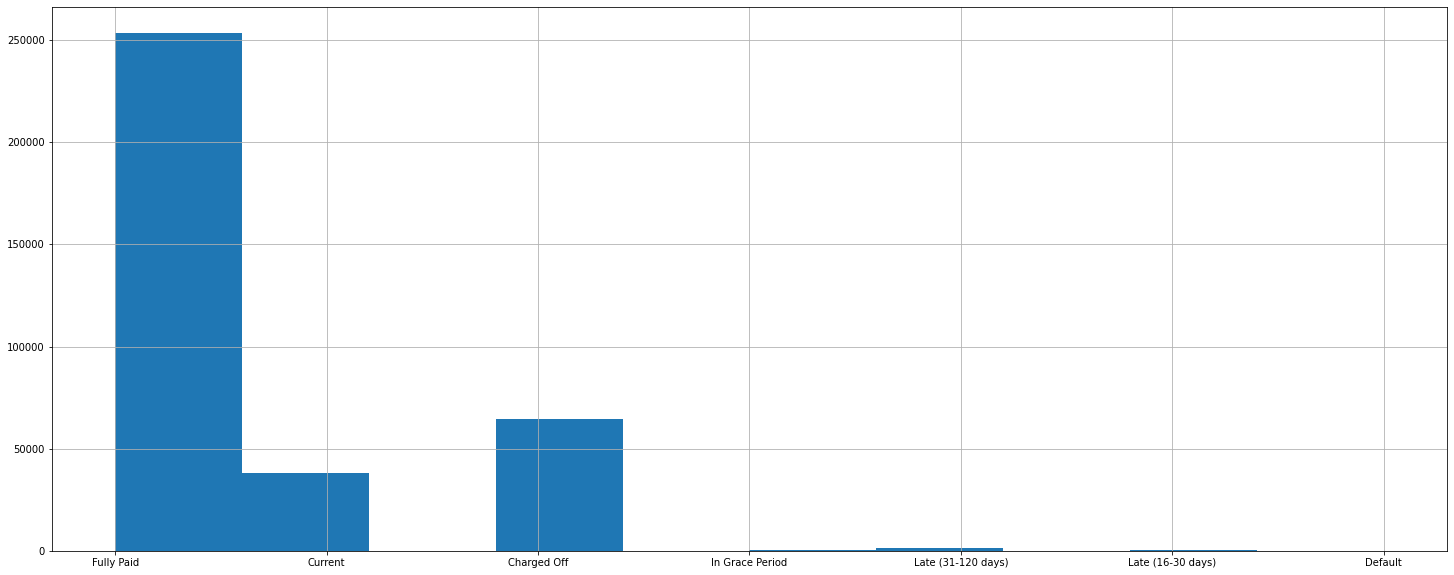

In [82]:
plt.figure(figsize=(25,10))
ncleaned_a_data['loan_status'].hist()


### Let us see graphs of some other important variables

#### Variable: loan_amnt

Data_Dictionary: The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

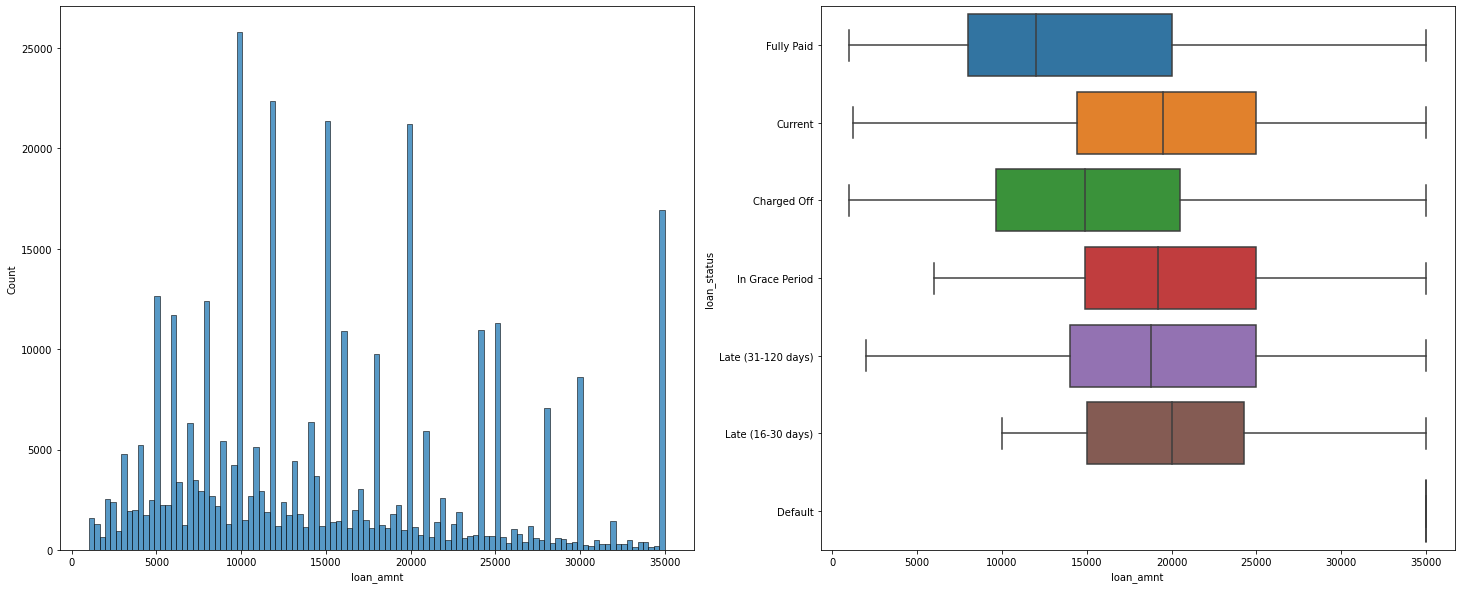

In [92]:
boxplot_distributionplot(ncleaned_a_data, 'loan_amnt')

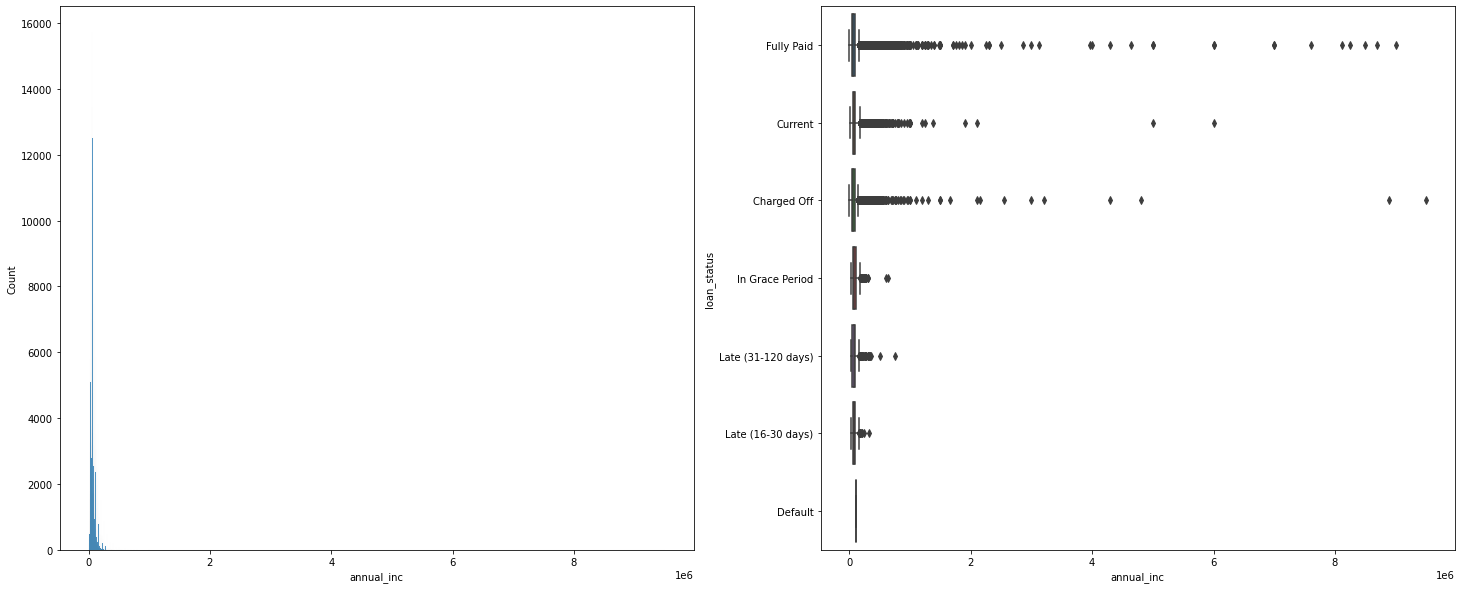

In [131]:
boxplot_distributionplot(ncleaned_a_data, 'annual_inc')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


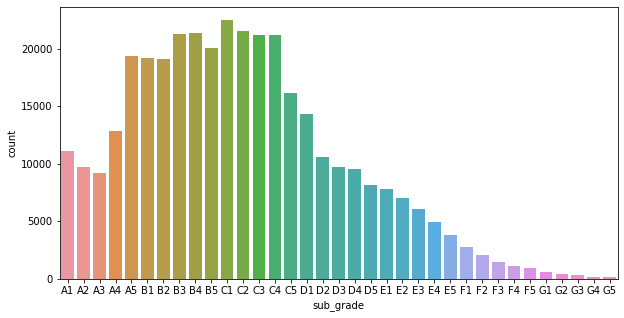

In [136]:
plt.figure(figsize=(10,5))
sns.countplot(ncleaned_a_data['sub_grade'], order=sorted(ncleaned_a_data.sub_grade.unique()))
plt.show()

Reference :https://github.com/akshayr89/Lending-Club---Exploratory-Data-Analysis/blob/master/AkshayRohankar_LendingClub.ipynb